# Project 2 - Ames Housing Data and Kaggle Challenge
![](./assets/images/Suburb_header_image.png)
[Image Source](https://homeownershipmatters.realtor/issues/these-3-suburbs-are-leading-the-way-in-the-u-s-markets-suburban-boom/)

## Table of Content

1. [Background](#Background)
2. [Dataset](#Dataset)
3. [Functions](#Functions)
4. [Python Libraries Used](#Libraries)
5. [Train Dataset](#Train_Dataset)
6. [Data Wrangling](#Data_Wrangling)
7. [Null Values](#Null_Values)
8. [EDA](#EDA)
9. [Model Preprocessing](#Model_Preprocessing)
10. [Machine Learning](#Machine_Learning)
11. [Conclusion](#Conclusion) 

## Background
Create an app for a real estate agent to better estimate the selling price of a house he would like to market

remove outlier
fill with 'Na'
get dummy
lasso
boxplot the ranking
drop no diff orinal data
map the rest using function dict and loops
but at the expense of accurarcy to change to 0 and 1 for ordinals

special note in description to drop outliers.

use heatmap drop highly correlated variables.
use subset selection (forward stepwise selection and bacwards stepwise) iterate 2 selection to get best subset(sklearn feature selection)

Purpose of this project is to create a regression model based on the Ames Housing Dataset. This model will be used to predict the price of a house on sales.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

I'll be using: train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process

The results of testing the model will be submitted to [Kaggle](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge)

## Dataset

There will be two datasets used. One to train the model and the other to test the model.

They can be found [here](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge/data).

The description of the dataset can be found [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

## Functions

In [1]:
#Function to fill in null values base on whether its an object
def clean_null_obj(df):
    obj_cols = df.select_dtypes([object]).columns
    df[obj_cols] = df[obj_cols].fillna("NA")
    return df

In [2]:
#Function to fill in null values base on whether its an int/float
def clean_null_num(df):
    n_cols = df.select_dtypes([np.int64,np.float64,np.uint64]).columns
    df[n_cols] = df[n_cols].fillna(0)
    return df

In [3]:
# Function to clean the categorical variables in the dataset

def clean_df_cat(df):
    
    #Drop Category columns
    df = df.drop(['Fence','Misc Feature','Garage Qual','Heating',
                  'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                  'Mas Vnr Type','Roof Style','Land Slope','Lot Config','Utilities','Street'],axis =1)
    #Convert/Merge columns (Ordinal)
    df['Garage Cond']= df['Garage Cond'].apply(lambda x: 0 if (x == 'Po')|(x=='Fa')else 1)
    df['Garage Type'] = df['Garage Type'].apply(lambda x: 1 if (x=='Attchd')|(x=='BuiltIn')|(x=='2Types') else 0)
    df['Fireplace Qu'] = df['Fireplace Qu'].apply(lambda x: 2 if (x=='Ex') else(0 if (x=='Po')|(x=='TA')else 1))
    df['Functional'] = df['Functional'].apply(lambda x: 0 if (x=='Sal')|(x=='Sev')|(x=='Maj2') else 1)
    df['Electrical'] = df['Electrical'].apply(lambda x: 1 if (x=='SBrkr') else 0)
    df['Heating QC'] = df['Heating QC'].apply(lambda x: 2 if (x=='Ex') else(0 if (x=='Po') else 1))
    df['Bsmt Cond'] = df['Bsmt Cond'].apply(lambda x: 1 if (x=='Ex')|(x=='Gd')|(x=='TA') else 0)
    df['Bsmt Qual'] = df['Bsmt Qual'].apply(lambda x: 2 if (x=='Ex') else(1 if (x=='Gd')else 0))
    df['Exter Cond'] = df['Exter Cond'].apply(lambda x: 2 if (x=='Ex') else(0 if (x=='Po') else 1))
    df['Exter Qual'] = df['Exter Qual'].apply(lambda x: 2 if (x=='Ex') else(1 if (x=='Gd') else 0))
    df['Condition 2'] = df['Condition 2'].apply(lambda x: 1 if (x == 'PosA')|(x=='PosN') else 0)
    
    #Convert/Merge columns (Norminal)
    df['Foundation'] = df['Foundation'].apply(lambda x: 'others' if (x!='Wood')&(x!='PConc') else x)
    df['Roof Matl'] = df['Roof Matl'].apply(lambda x: 'wood' if (x=='WdShake')|(x=='WdShngl') else 'others')
    
    return df

In [4]:
# Function to prep numbrical variables
def clean_data_numerical(df):
    
    #Drop Columns
    df = df.drop(['Mo Sold','Misc Val','Pool Area','Wood Deck SF','Garage Yr Blt','Kitchen AbvGr',
                  'Bedroom AbvGr','Half Bath','Bsmt Half Bath','Low Qual Fin SF','Bsmt Unf SF',
                  'BsmtFin SF 2','Mas Vnr Area','Lot Area','Lot Frontage','PID','Id'],axis=1)
    
    #Convert MS SubClass to 3 broad categories
    df['MS SubClass'] = df['MS SubClass'].apply(lambda x: 'a' if (x==120)|(x==60) else('b' if (x==75) else 'c'))
    
    #Feature Engineering
    df['Porch']= df.apply(lambda x: 'open' if x['Open Porch SF'] >0 else('enclosed' if x['Enclosed Porch']>0 
                                                                         else('3Ssn' if x['3Ssn Porch'] > 0 
                                                                              else('screen' if x['Screen Porch']>0 
                                                                                   else 'NA'))),axis =1)
    df['Age Sold'] = df.apply(lambda x: 0 if x['Yr Sold']-x['Year Built']<1 #filter out negative numbers
                              else x['Yr Sold']-x['Year Built'],axis=1)
    
    
    df['Age Remodeled'] = df.apply(lambda x: '0' if (x['Year Remod/Add']-x['Year Built']<1) #This would filter out a -1 value
                                   else('<20' if (x['Yr Sold']-x['Year Remod/Add']<21) 
                                        else '>20'),axis=1)
    #Drop combined/merge columns
    df = df.drop(['Year Remod/Add','Year Built','Yr Sold','Screen Porch','3Ssn Porch','Enclosed Porch','Open Porch SF'],axis=1)
    
    return df

In [5]:
# Function to run boxplots
def create_boxplot(df,col):
    x = df[[col,'SalePrice']]
    sns.boxplot(x=col,y='SalePrice',data=x)
    plt.title(col+' vs Sale Price')

In [6]:
# Function to run scatterplot
def create_scatterplot(df,col):
    sns.scatterplot(data=df,x=col,y='SalePrice')
    plt.title(col+' vs Sale Price')

## Libraries

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

## Train_Dataset

In [8]:
train_dataset = '../assets/datasets/train.csv'
df_train = pd.read_csv(train_dataset)

In [9]:
df_train.shape

(2051, 81)

## Test_Dataset

In [10]:
test_dataset = './assets/datasets/test.csv'
df_test = pd.read_csv(test_dataset)

In [11]:
df_test.shape

(878, 80)

#### Special Note
From the given description of the DataSet:
"There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."

In [12]:
# Remove houses with more than 4k sq feet as recommended

df_filtered = df_train[df_train['Gr Liv Area'] <4000]

In [13]:
df_filtered.shape

(2049, 81)

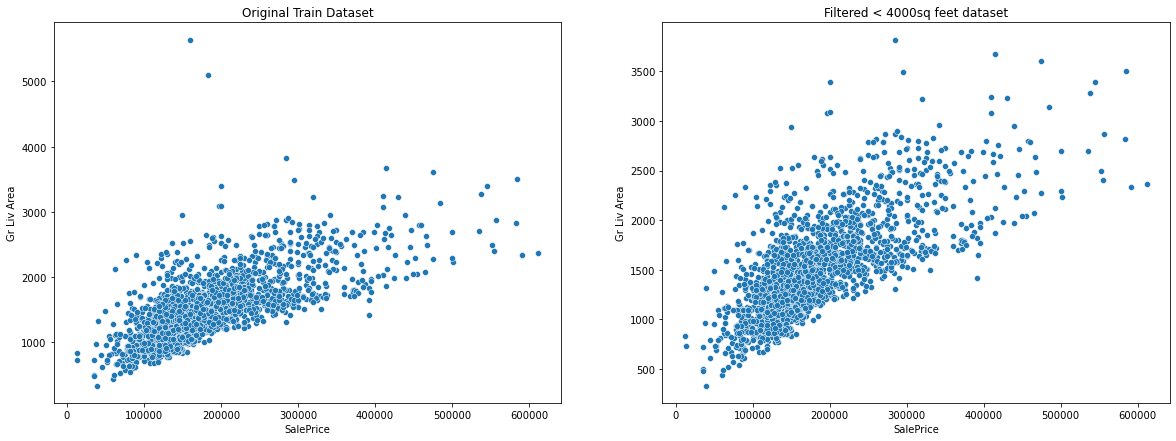

Original Train Dataset variables,observations: (2051, 81)
After Filtering for < 4,000 sq feet: (2049, 81)


In [14]:
# Plot before and after

plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train,x='SalePrice',y='Gr Liv Area')
plt.title('Original Train Dataset')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_filtered,x='SalePrice',y='Gr Liv Area')
plt.title('Filtered < 4000sq feet dataset')
plt.show()

print('Original Train Dataset variables,observations:',df_train.shape)
print('After Filtering for < 4,000 sq feet:',df_filtered.shape)

##### Observations
There were only 2 outliers that were filtered out.

Upon further visual inspection of the data, I've come to realise the train dataset given was a filtered version of the original.

The original had 2930 observations, 82 variables.

The given train dataset has 2051 observations and 81 variables.

Perhaps the other outliers were filtered out via the test set which has 878 observations.

The variable: "Sale Condition" which described the sales transactions as normal,abnormal,partial, etc, was also removed from the original dataset.

In [15]:
# Check for duplicates
df_filtered[df_filtered.duplicated()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


##### Observations
Looks like there is no duplicated rows to worry about.

## Data_Wrangling

The variables can be split between two types: Categorical (objects) and Numerical (int or float).
I'll be using boxplots for catergorical data and scatter plots for numerical data to filter out variables that do not clearly define the salesprice of a home.
Lastly I'll also be using a heatmap to examine the correlational relationship for the numerical datasets

### Catergorical Data

In [16]:
# Fill in null value in catergorical data as "NA" to reflect that there isn't that attribute in the variable for that
# particualar property

df_filtered = clean_null_obj(df_filtered)

/Users/joeltan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


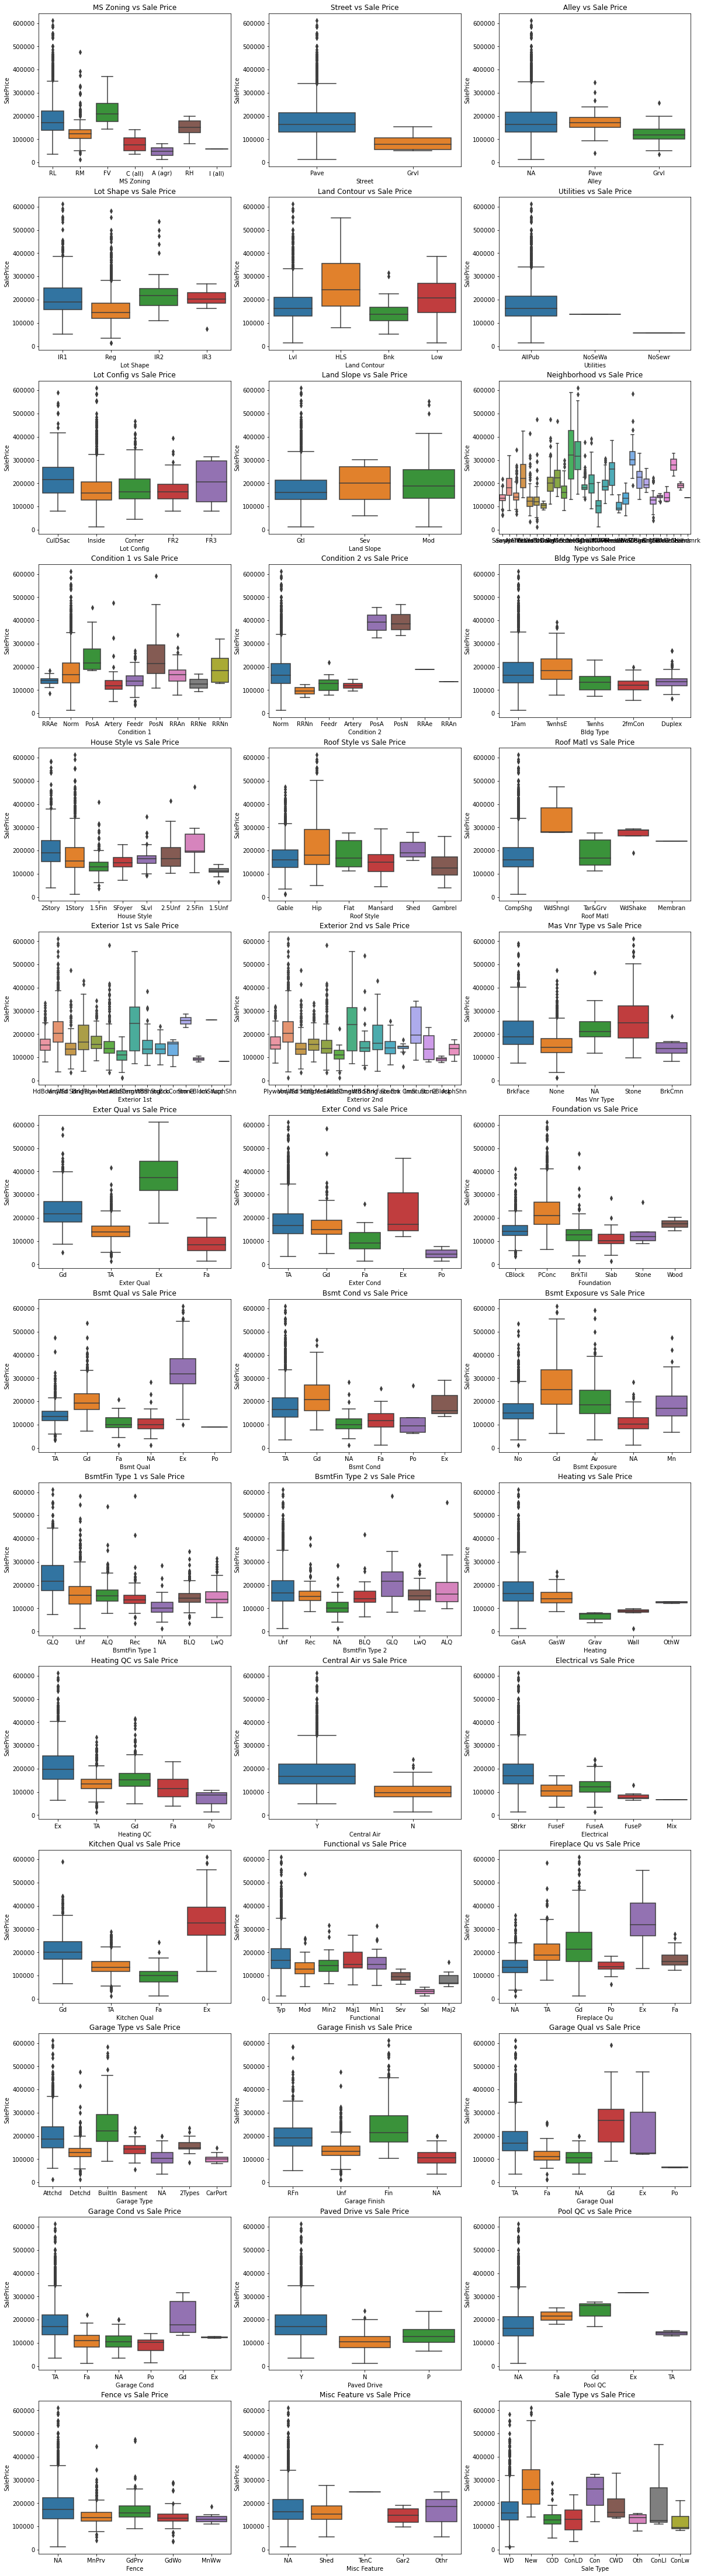

In [17]:
# List of Object type columns to run on
columns_cat = list(df_filtered.dtypes.index[df_filtered.dtypes=='object'])

# Loop through list to display plots
plt.figure(figsize=(20,80))
for i,column in enumerate(columns_cat):
        plt.subplot(14,3,i+1)
        create_boxplot(df_filtered,column) #function create_boxplot

plt.show()

#### Observations
1. Variables to drop:
|Variables| Reason for dropping|
|---|---|
Fence|not much difference in price range
Misc Feature| not much difference in price range
Garage Qual| Very similar to Garage Cond
Heating| data captured in Heating QC
Bsmt Exposure| info reflected in Bsmt Cond and Qual
BsmtFin Type 1| info reflected in Bsmt Cond and Qual
BsmtFin Type 2| info reflected in Bsmt Cond and Qual
Mas Vnr Type| There are two labels for missing values: "None and NaN"
Roof Style| the different types are within the same interquartile price range
Land Slope| there isn't much difference in the price range
Lot Config| there isn't much difference in the price range
Utilities| Mostly all in one category
Street| Info captured under Alley

2. Variables with distinct categories that can be combined/grouped: 
|Variable|attributes
|---|---|
Garage Cond| TA, Gd, Ex to 1 the rest to 0
Garage Type| Attchd, Bulitin, 2Types to 1 the rest to 0
Fireplace Qu| Ex as 2, Gd, TA and Fa as 1, the rest as 0
Functional| Sev, Sal, Maj2 as 0 the rest as 1
Electrical| SBrkr as 1 the rest as 0
Heating QC| Ex as 2, Ta,Gd, Fa as 1, Po as 0
Bsmt Cond| Ex, Ta, Gd as 1, the rest as 0
Bsmt Qual|Ex as 2, Gd 1, the rest as 0
Foundation| PConc, Wood, and the rest as others
Exter Cond| Ex as 2, Po as 0 and the rest as 1
Exter Qual| Ex as 2, Gd, as 1, the rest as 0
Roof Matl| WdShngl and WdShake as wood and the rest as others
Condition 2| PosA and PosN as 1 and the rest as 0

3. Variables to keep as is: Sale Type, Paved Drive, Pool QC, Garage Finish, Kitchen Qual, Central Air, Exterior 1st,Exterior 2nd, House Style,Bldg Type, Condition 1, Neighborhood, Land Contour, Lot Shape, Alley, MS Zoning

_Note the decision to keep, drop or merge the variables are based on a mix of logic, looking at the boxplot and researching online/ descriptive abstract of the different terms._

In [18]:
# Run Function to clean the caterogrical data as observed above
df_filtered_1 = clean_df_cat(df_filtered)

In [19]:
dropped_cols = ['Fence','Misc Feature','Garage Qual','Heating',
                                    'Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
                                   'Mas Vnr Type','Roof Style','Land Slope','Lot Config','Utilities','Street']
updated_cat_col = [x for x in columns_cat if x not in dropped_cols]

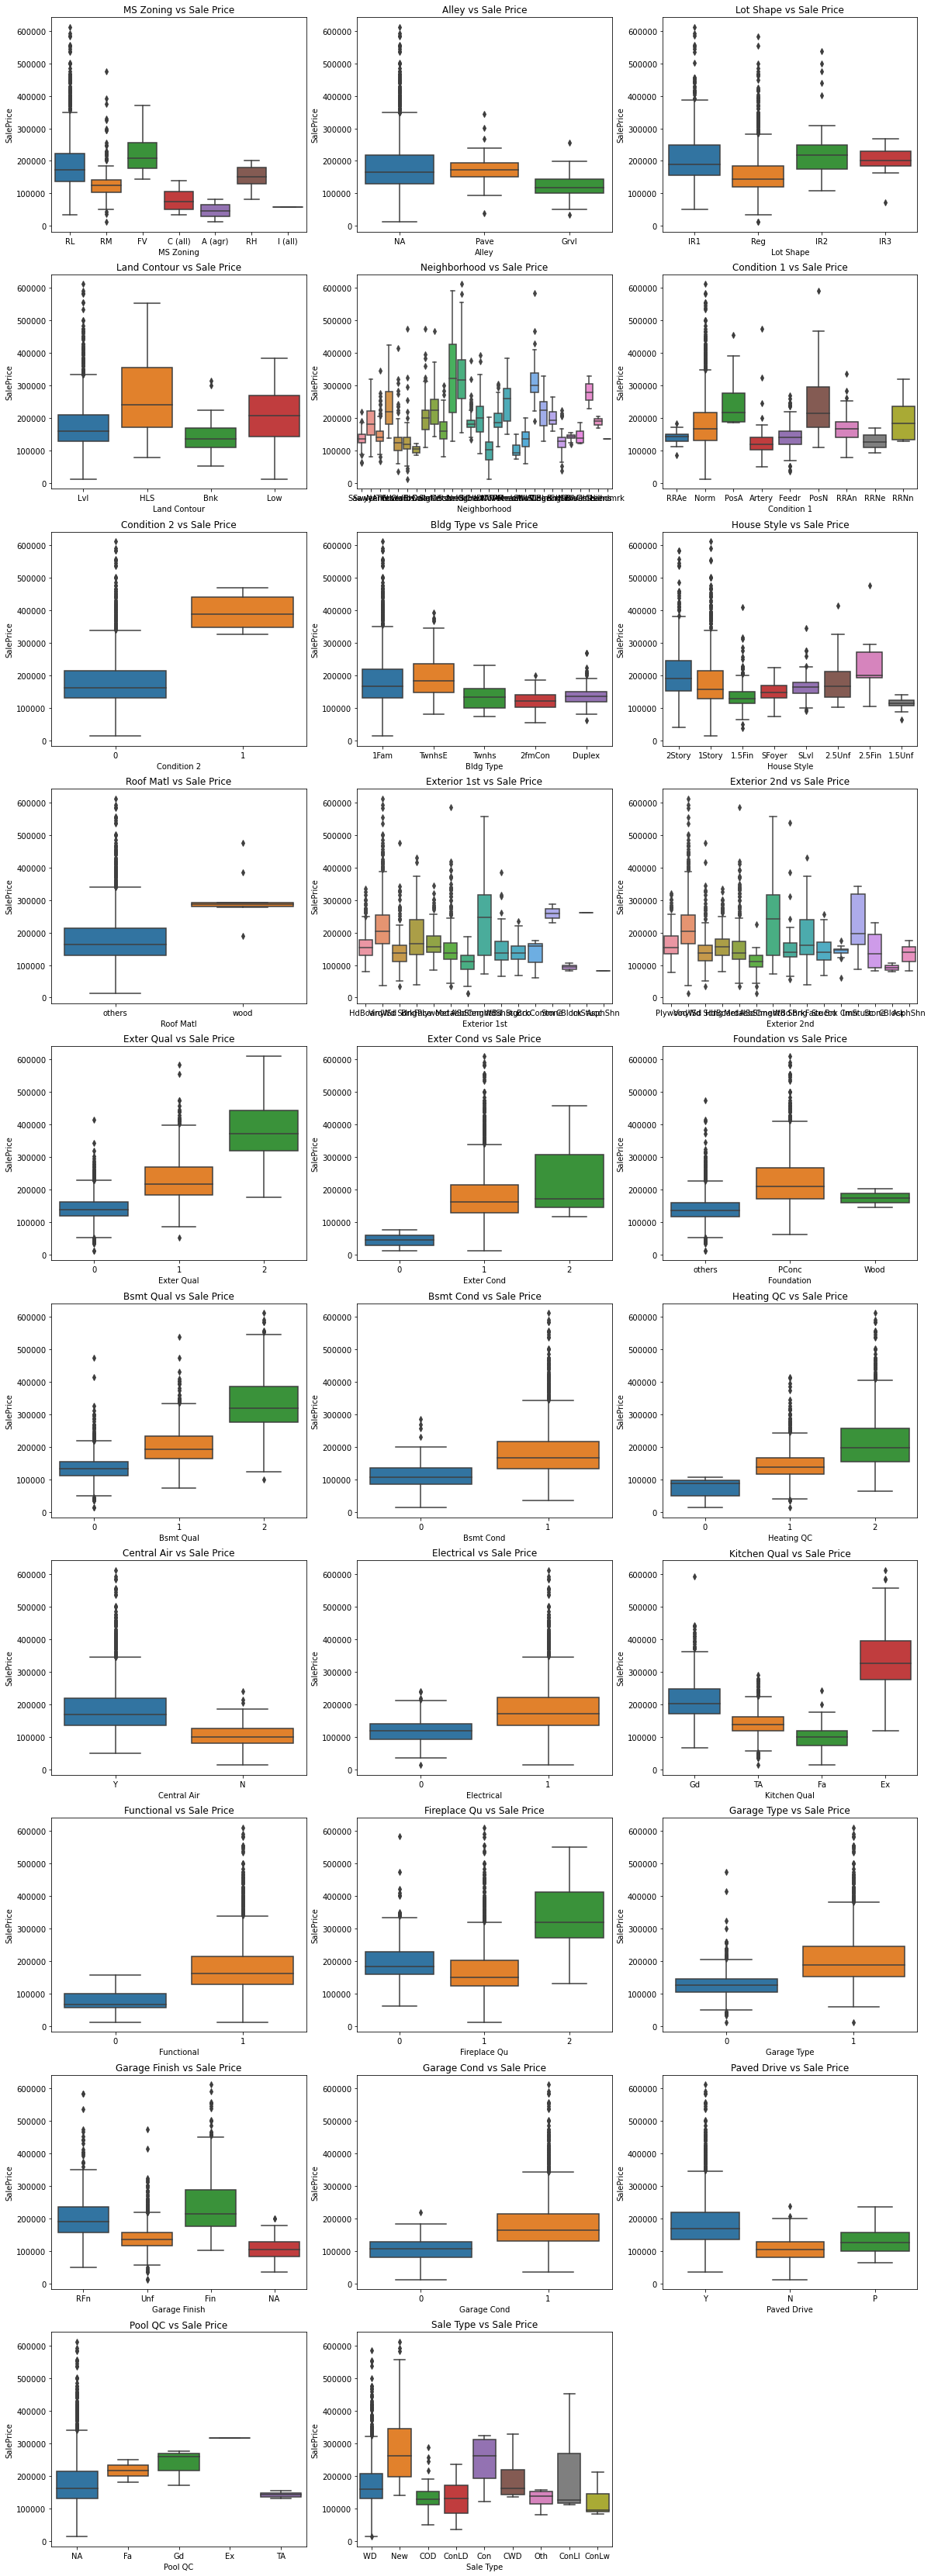

In [20]:
# Loop through list to display plots
plt.figure(figsize=(20,60))
for i,column in enumerate(updated_cat_col):
        plt.subplot(10,3,i+1)
        create_boxplot(df_filtered_1,column) #function create_boxplot

plt.show()

#### Observations

After cleaning up the catergorical variables, I'm pretty satisfied with the outcome, perhaps more could be done for certain categories like Sale Type, Neighbourhood, and Exterior 1/2. But I cannot think of a way to simplified these catergories without affecting the integrity of the data.

### Numerical Data

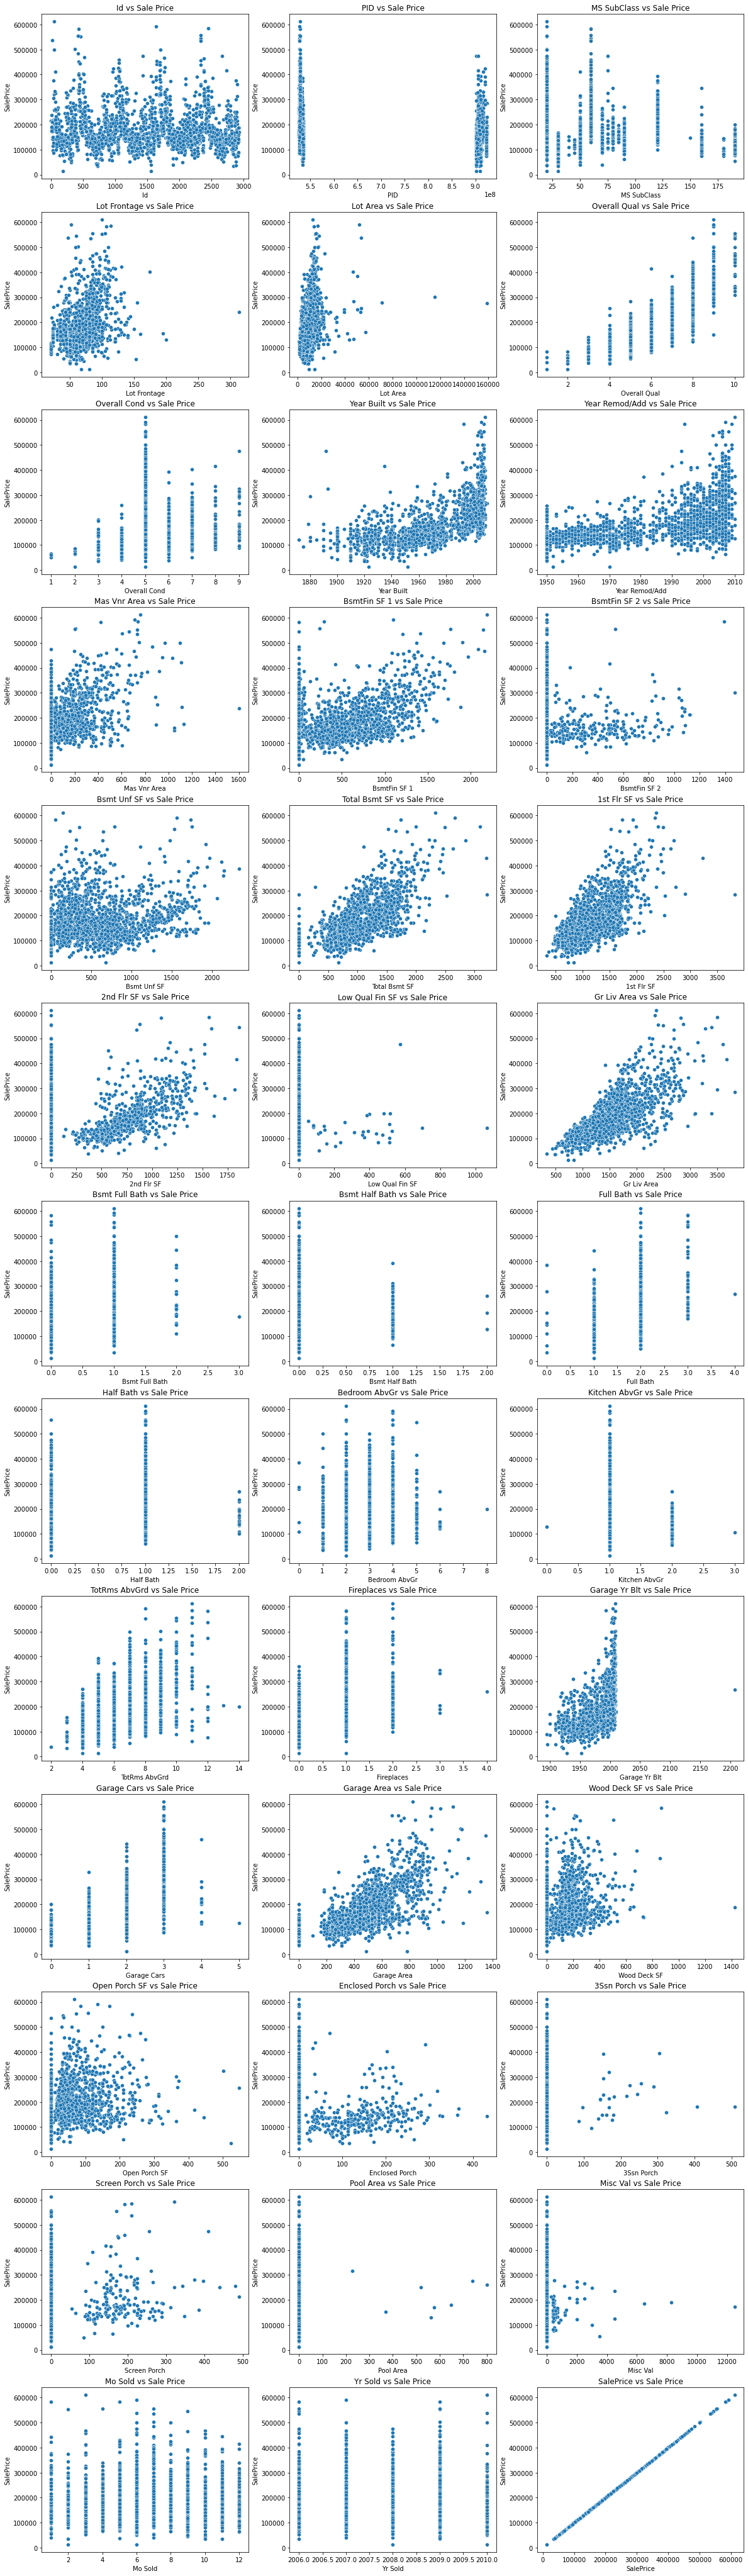

Total variables:  39


In [22]:
#Look at the relationship between the numerical data and the salesprice
#using scatterplot
columns = list(df_filtered.dtypes.index[(df_filtered.dtypes=='int64') | (df_filtered.dtypes=='float64')])
count = 0
plt.figure(figsize=(20,80))
for i,column in enumerate(columns):
        plt.subplot(14,3,i+1)
        create_scatterplot(df_filtered,column)
        count+=1
plt.show()
print('Total variables: ',count)

#### Observations

1. Variables to Drop
|Variables| Reason for dropping|
|---|---|
Id|This should be the index from where the data was pulled
PID|This is to identify the specific property and it is not of use here
Lot Frontage|no clear pattern discernable
Lot Area| the same as Lot Frontage
Mas Vnr Area| No clear pattern that can be established
BsmtFin SF 2| No clear pattern that can be established
Bsmt Unf SF| No clear pattern and it is not logical that the size of an unfinish basement would affect the sales price
Low Qual Fin SF| No clear pattern that can be established
Bsmt Half Bath| No clear pattern that can be established
Half Bath| No clear pattern that can be established
Bedroom AbvGr| No clear pattern that can be established
Kitchen AbvGr| Most are graded 1 with 2 and above not making any impact
Garage Yr Blt| There's an outlier at year 2200
Wood Deck SF| No clear pattern that can be established
Pool Area| this information should be captured in Pool QC
Misc Val| Established earlier with Misc Feature not contributing to the sales price range
Mo Sold| This is not going to help our consumer decide on how to price a house

2. To Convert to catergorical
MS SubClass: 120 and 60 as 'a', 20 and 75 as 'b' the rest as 'c'



3. To Feature Engineer
* Combine: Open Porch SF, Enclosed Porch, 3Ssn Porch and Screen Porch into one catergorical variable call Porch
* Combine: Year Sold and Year Built to get Age of the house when sold
* Combine: Year Remod/Add, Year Built, and Year Sold to see if remodeling affects

In [23]:
# Convert and feature engineer as above observation
df_filtered_1 = clean_data_numerical(df_filtered_1)

In [24]:
df_filtered_1.shape

(2049, 47)

## Null_Values

In [25]:
# Check for null values
null_df = pd.DataFrame(df_filtered_1.isnull().sum())
null_df.rename(columns = {0:'total null'},inplace=True)
null_df['percentage %'] = round(null_df['total null']/2049*100,2)
null_df['column type'] = [v for v in df_filtered_1.dtypes]


print('Total null Columns ',null_df[null_df['total null']>0].count()[0])
print('Total null values ', null_df['total null'].sum())

null_df[null_df['total null']>0].sort_values(by = 'total null',ascending=False)

Total null Columns  5
Total null values  6


,total null,percentage %,column type
Bsmt Full Bath,2,0.10,float64
BsmtFin SF 1,1,0.05,float64
Total Bsmt SF,1,0.05,float64
Garage Cars,1,0.05,float64
Garage Area,1,0.05,float64


In [26]:
#Look at the null row for Garage
df_filtered_1[['Garage Cars','Garage Cond','Garage Finish','Garage Type','Garage Area']][df_filtered_1['Garage Cars'].isnull()]

,Garage Cars,Garage Cond,Garage Finish,Garage Type,Garage Area
1712,NaN,1,NA,0,NaN


In [27]:
#Look at the nul row for BsmtFin and Bsmt Full Bath
df_filtered_1[['Total Bsmt SF','BsmtFin SF 1','Bsmt Qual','Bsmt Full Bath','Bsmt Cond']][df_filtered_1['Bsmt Full Bath'].isnull()]

,Total Bsmt SF,BsmtFin SF 1,Bsmt Qual,Bsmt Full Bath,Bsmt Cond
616,0.0,0.0,0,NaN,0
1327,NaN,NaN,0,NaN,0


##### Observations

Original train dataset given had a total of 9816 null values across 26 columns
After filling up NaN catergorical attributes as "NA" and some feature engineering I'm left with 6 null values

Looks like the null attributes are for properties without either a basement or a garage. As such I will fill them is as 0

In [28]:
#Fill numerical null values
df_filtered_1 = clean_null_num(df_filtered_1)

## EDA

In [40]:
df_filtered_1.corr()['SalePrice'].sort_values(ascending=False).head(6)

SalePrice        1.000000
Overall Qual     0.803462
Gr Liv Area      0.719463
Exter Qual       0.714476
Bsmt Qual        0.692490
Total Bsmt SF    0.665116
Name: SalePrice, dtype: float64

Interesting that basement quality and total basement square feet is in the top 5 correlation to sales price of a property in the US. 

We generate a pairplot to take a look at other possible relationships

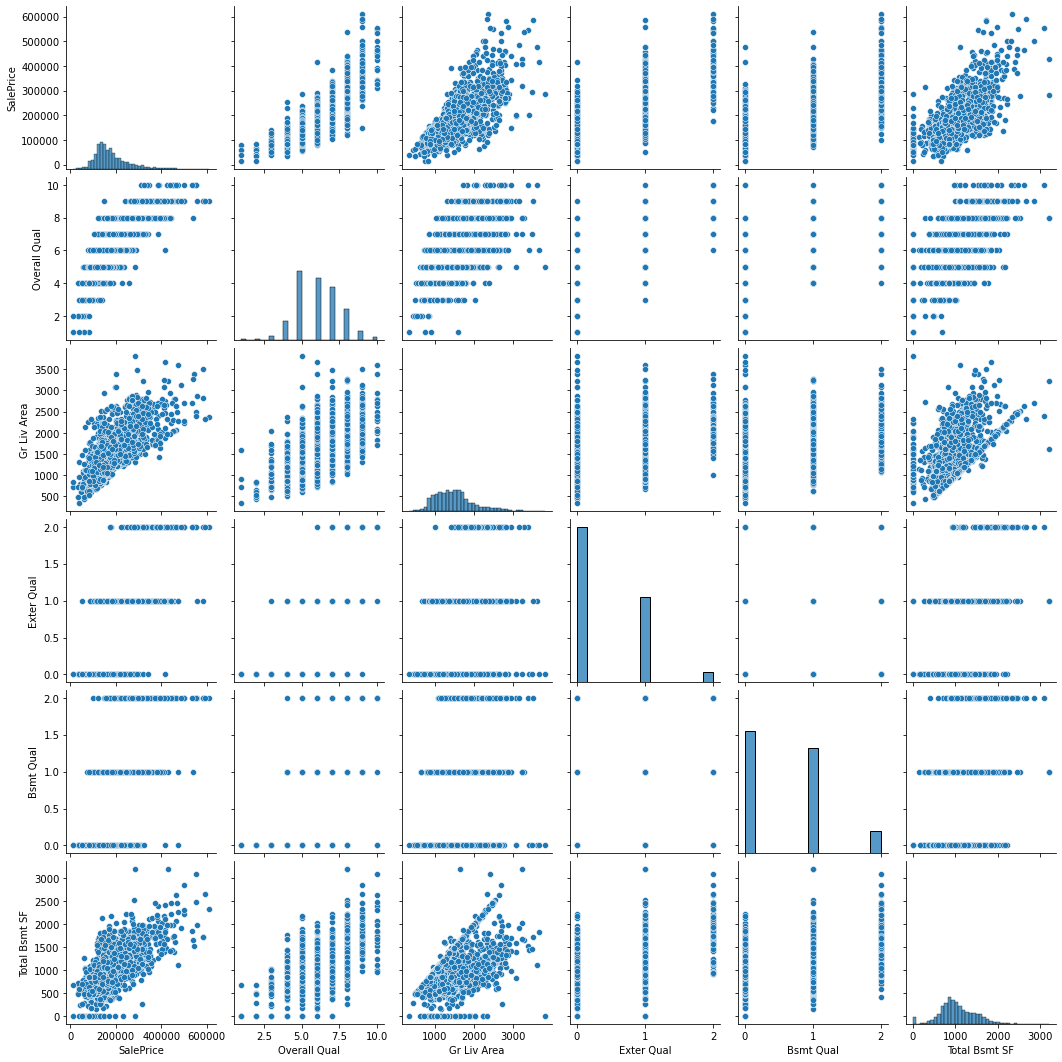

In [51]:
top_5 = list(df_filtered_1.corr()['SalePrice'].sort_values(ascending=False).head(6).index)
sns.pairplot(df_filtered_1[top_5]);

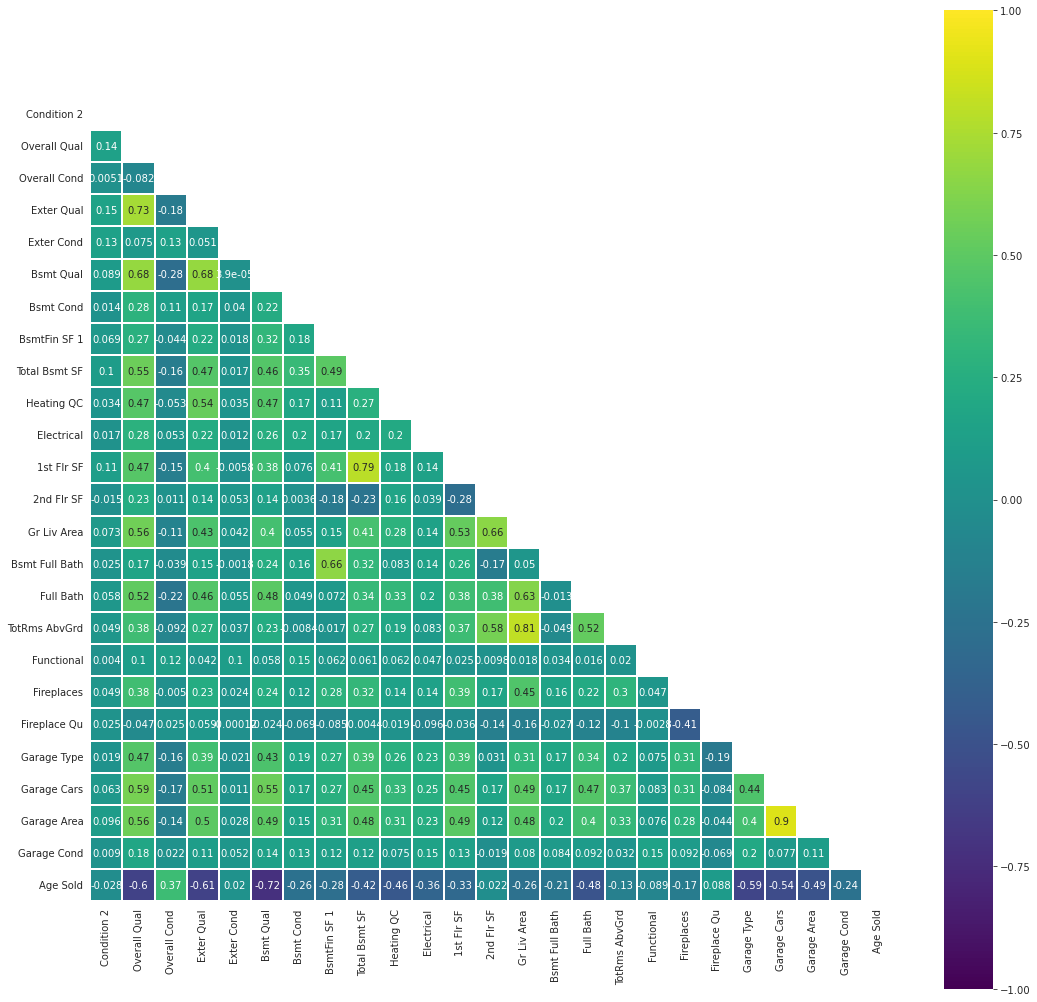

In [47]:
# Plot heatmap 
plt.figure(figsize=(18,18))

corr = df_filtered_1.drop('SalePrice',axis=1).corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    sns.heatmap(corr,mask=mask,square= True,annot=True, linewidths=0.25,vmin = -1, vmax = 1, cmap='viridis')
    
plt.show()

#### Observations

Some strong correlations are Bsmt Qual with Overall Qual and Exter Qual at 0.68, Bsmt Full Bath with Total Bsmt SF at 0.66(which makes sense since if you're goint to install a full bathroom at the basement, it going to need a larger area)

Of note is Garage Cars with Garage Area it does make sense that they are highly correlated since the number of cars possible to fit into a garage would be calculated from the area. I shall leave this alone for now but may come back to drop one.

Another high correlated relationship would be TotRms AbvGrd and Gr Liv Area while their relation is entwined, it is my opinion that they capture slightly different perspective of the property and as such I also plan to leave it as it is.

Same goes for 1st Flr SF and Total Bsmt SF.

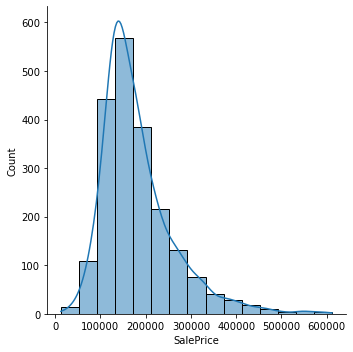

In [56]:
#Histogram of SalesPrice

sns.displot(df_filtered_1['SalePrice'],bins=15,kde=True);

#### Observations
Looks like our sales price is skrewed slightly to the right, with most of the property price falling between \$100k - \$200k 

## Model_Preprocessing

## Machine_Learning

## Conclusion